# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sievin Nathanael
- **Email:** sievinnathanael@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis




1. jam berapa yang paling banyak dan paling sedikit penyewanya?

2. apakah tingkat kelembaban mempengaruhi jumlah penyewa?

3. Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?

4. Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?

## Import Semua Packages/Library yang Digunakan

In [6]:
# memanggil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# akses dataframe hour
hour_df = pd.read_csv('/content/drive/My Drive/hour.csv')
hour_df.head(100)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,1,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,1,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88


In [8]:
# akses dataframe day
day_df = pd.read_csv('/content/drive/My Drive/hour.csv')
day_df.head(100)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,1,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,1,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88


**Insight:**
- tabel "Day" berisi informasi tentang jumlah transaksi pada skala hari & detail kondisi hari
- tabel "Hour" berisi informasi tentang jumlah transasksi pada skala jam & detail kondisinya

### Assessing Data

In [9]:
# cek tipe data
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [10]:
# Mengecek missing values untuk hour_df
print("Missing values in hour_df:")
print(hour_df.isna().sum())

# Memisahkan output untuk day_df
print("\nMissing values in day_df:")
print(day_df.isna().sum())

Missing values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- tidak ada data yang NULL pada tabel day_df & hour_df


In [11]:
# memeriksa duplikasi
print(" duplikat hour : ", hour_df.duplicated().sum())
print(" duplikat day : ", day_df.duplicated().sum())

 duplikat hour :  0
 duplikat day :  0


**Insight:**
- tidak ada data duplikat

In [12]:
# memeriksa parameter statistik dari tabel day

day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:

# memeriksa parameter statistik dari tabel hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleansing Data

####Summary

- Kolom 'Temp', 'atemp' akan di drop karena tidak akan digunakan sebagai parameter analisis
- ubah tipe data kolom "dteday" menjadi datetime agar lebih mudah di olah
- replace value pada kolom agar lebih mudah di analisa
- create 2 kolom untuk menandakan apakah hari libur (weekend atau holiday) & mengklasifikasikan tingkat kelembaban




Dropping column

In [14]:
# hapus kolom 'temp' & 'atemp' pada dataframe utama
hour_df.drop(['atemp'], axis = 1, inplace= True)
day_df.drop(['temp'], axis = 1, inplace= True)
hour_df.drop(['temp'], axis = 1, inplace= True)
day_df.drop(['atemp'], axis = 1, inplace= True)

In [15]:
# cek apakah kolom sudah sesuai
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-N

#### alter tipe data

In [16]:
# alter kolom 'dteday' menjadi tipe data datetime & alter kolom "hum" menjadi int
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### ubah value pada kolom

In [17]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.yr.replace((0,1), ('2011','2012'), inplace=True)
hour_df.yr.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['hum'] = day_df['hum']*100
hour_df['hum'] = hour_df['hum']*100

<ipython-input-17-812c7b34c68c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-17-812c7b34c68c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [18]:
#crosscheck data
print("data day")
print(day_df.head())
print  ("\ndata hour")
print(hour_df.head())

data day
   instant     dteday  season    yr mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01  Spring  2011  Jan   0        0  Saturday           0   
1        2 2011-01-01  Spring  2011  Jan   1        0  Saturday           0   
2        3 2011-01-01  Spring  2011  Jan   2        0  Saturday           0   
3        4 2011-01-01  Spring  2011  Jan   3        0  Saturday           0   
4        5 2011-01-01  Spring  2011  Jan   4        0  Saturday           0   

  weathersit   hum  windspeed  casual  registered  cnt  
0      Clear  81.0        0.0       3          13   16  
1      Clear  80.0        0.0       8          32   40  
2      Clear  80.0        0.0       5          27   32  
3      Clear  75.0        0.0       3          10   13  
4      Clear  75.0        0.0       0           1    1  

data hour
   instant     dteday  season    yr mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01  Spring  2011  Jan   0        0  Saturday           0   
1    

In [19]:
# Membuat kolom baru bernama category_days yang berisi value weekend/weekdays berdasarkan function dibawah
def get_category_days(row):
    if row["weekday"] in ["Saturday", "Sunday"]: #jika sabtu & minggu return weekend
        return "weekend"
    elif row["holiday"] != 0: #jika hari libur maka di categorykan sebagai weekend
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df.apply(get_category_days, axis=1 )
day_df["category_days"] = day_df.apply(get_category_days, axis=1 )


# Membuat kolom baru bernama classify_humidity yang berisi klasifikasi tingkat kelembaban
def classify_humidity(row):
    if row["hum"] < 45:
        return "Terlalu kering"
    elif row["hum"] >= 45 and row["hum"] < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df.apply(classify_humidity, axis= 1)
day_df["humidity_category"] = day_df.apply(classify_humidity, axis=1 )

#crosscheck hasil
print("data day")
print(day_df.head())
print  ("\ndata hour")
print(hour_df.head())

data day
   instant     dteday  season    yr mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01  Spring  2011  Jan   0        0  Saturday           0   
1        2 2011-01-01  Spring  2011  Jan   1        0  Saturday           0   
2        3 2011-01-01  Spring  2011  Jan   2        0  Saturday           0   
3        4 2011-01-01  Spring  2011  Jan   3        0  Saturday           0   
4        5 2011-01-01  Spring  2011  Jan   4        0  Saturday           0   

  weathersit   hum  windspeed  casual  registered  cnt category_days  \
0      Clear  81.0        0.0       3          13   16       weekend   
1      Clear  80.0        0.0       8          32   40       weekend   
2      Clear  80.0        0.0       5          27   32       weekend   
3      Clear  75.0        0.0       3          10   13       weekend   
4      Clear  75.0        0.0       0           1    1       weekend   

  humidity_category  
0    Terlalu Lembab  
1    Terlalu Lembab  
2    Terlalu Lemb

#### Done Cleansing data

- Kolom 'Temp', 'atemp' akan di drop karena tidak memiliki value analisis (DONE)
- ubah tipe data kolom "dteday" menjadi datetime agar lebih mudah di olah (DONE)
- replace value pada kolom agar lebih mudah di analisa (DONE)
- create 2 kolom untuk menandakan apakah hari libur (weekend atau holiday) & mengklasifikasikan tingkat kelembaban (DONE)




## Exploratory Data Analysis (EDA)

### Explore

In [20]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,11865,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [21]:
distinct_years_sorted = sorted(day_df['yr'].unique())
print("\njumlah tahun")
print(distinct_years_sorted)


jumlah tahun
['2011', '2012']


In [22]:
# total penyewa berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight tabel hour:**
- berdasarkan jumlah SUM total dari kolom "cnt" menunjukan jumlah pelanggaan adalah sebanyak 17379 dari tahun 2011 hingga 2012
- berdasarkan mean pada hasil statisik kolom 'hr' menunjukan aktifitas sering terjadi pada pukul 11.54
- berdsarkan analisa berdassrakan jumlah penyewa terhadap jam, menunjukan penyewa terbanyak ada pada pukul 17.00 dan paling sedikit ada pada pukul 04.00
-dapat dilihat pada kolom 'humidity category' memiliki jumlah terbanyak "terlalu lembab"

In [23]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,11865,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


####Summary tabel day
- sebenarnya untuk insight yang di dapat mirip dengan tabel hour,
tapi di tabel day kita bisa melihat category days yang paling banyak muncul adalah weekdays & musim yang paling banyak usernya adalah pada musim "fall"

In [24]:
# melihat jumlah penyewaan tiap season
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Sesuai dengan hasil describe statistik, bahwa pada musim "fall" memiliki jumlah penyewa palking banyak

In [25]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul
grouped_df = day_df.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

# mengurutkan data berdasarkan tahun
grouped_df.sort_values(by="yr", ascending=True, inplace=True)

# tambah kolom untuk memunculkan percentage
grouped_df['registered_pct_change'] = (grouped_df['registered'].pct_change() * 100).round(2)
grouped_df['casual_pct_change'] = (grouped_df['casual'].pct_change() * 100).round(2)

print(grouped_df)


     registered  casual registered_pct_change casual_pct_change
            sum     sum                                        
yr                                                             
2011     995851  247252                   NaN               NaN
2012    1676811  372765                 68.38             50.76


- dapat dilihat bahwa pada pada tahun 2012 terjadi peningkatan penyewa sebesar 68.38% untuk registered user & 50.76% untuk casual user


## Visualization & Explanatory Analysis

#### PERTANYAAN:
1. jam berapa yang paling banyak dan paling sedikit penyewanya?

2. apakah tingkat kelembaban mempengaruhi jumlah penyewa?

3. Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?

4. Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?

### Pertanyaan 1:
-jam berapa yang paling banyak dan paling sedikit penyewanya?

In [26]:
# melakukan grouping terhadap hours dan cnt
sum_cnt = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()

print(sum_cnt)

    hr     cnt
0   17  336860
1   18  309772
2    8  261001
3   16  227748
4   19  226789
5   13  184919
6   12  184414
7   15  183149
8   14  175652
9   20  164550
10   9  159438
11   7  154171
12  11  151320
13  10  126257
14  21  125445
15  22   95612
16  23   63941
17   6   55132
18   0   39130
19   1   24164
20   2   16352
21   5   14261
22   3    8174
23   4    4428


<ipython-input-27-112282991f16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_cnt.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-27-112282991f16>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_cnt.sort_values(by="hr", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


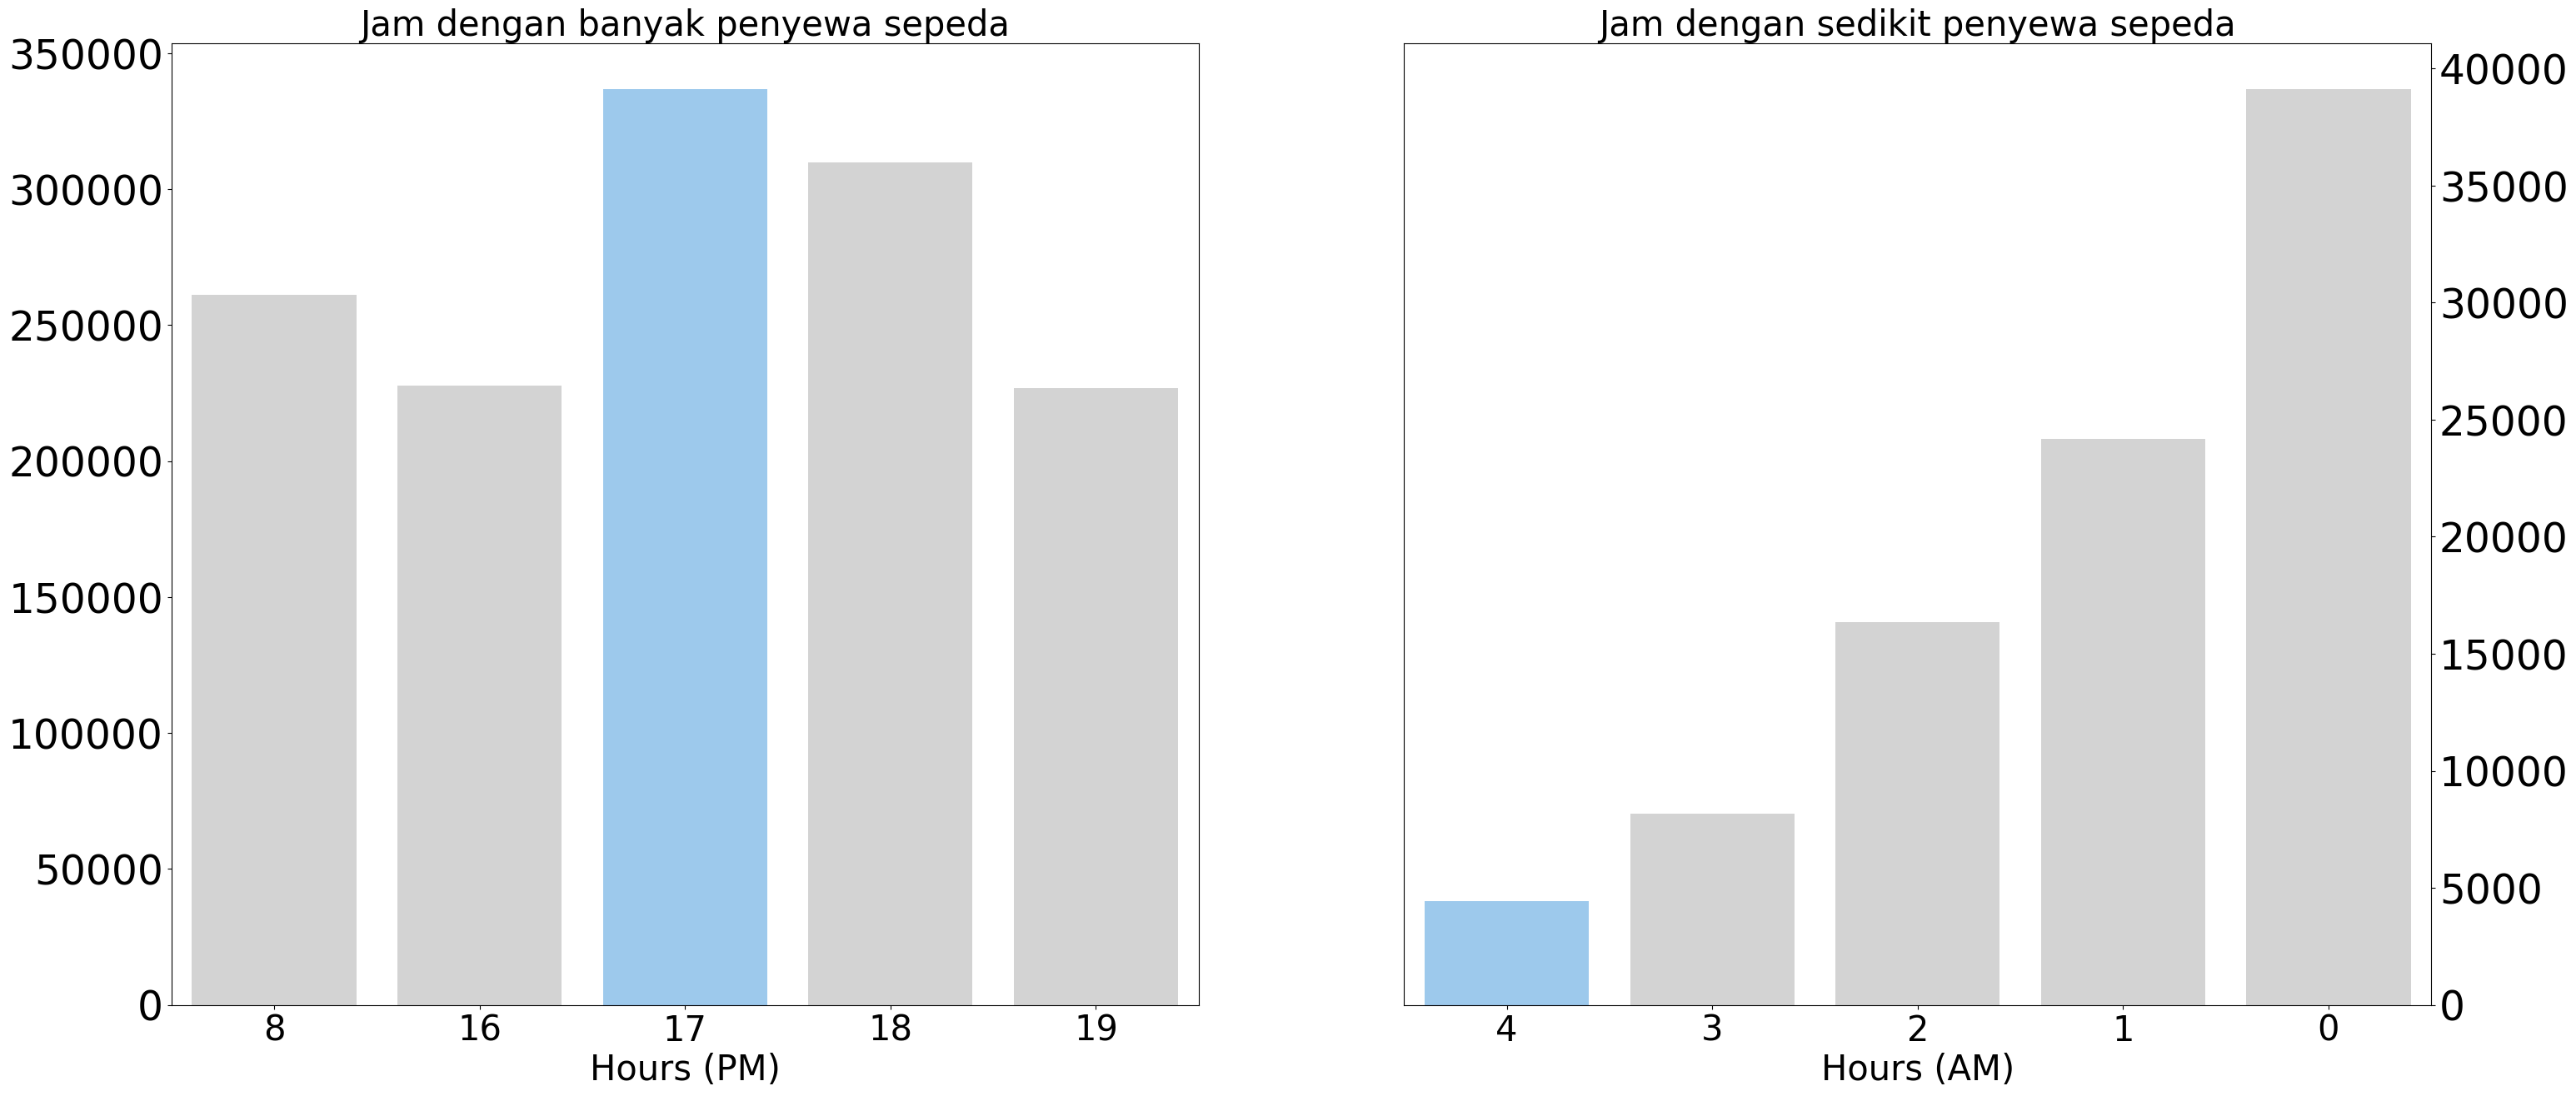

In [27]:
# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hr", y="cnt", data=sum_cnt.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hr", y="cnt", data=sum_cnt.sort_values(by="hr", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)



dari grafik di atas,  dapat disimpulkan bahwa penyewaan sepeda paling banyak digunakan pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual sekitar 4428 penyewaan.

### Pertanyaan 2:
-apakah tingkat kelembaban mempengaruhi jumlah penyewa?

In [28]:
# melakukan grouping terhadap hours dan cnt
humidity_sum = day_df.groupby(["humidity_category"]).cnt.sum().sort_values(ascending=False).reset_index()

print(humidity_sum)

  humidity_category      cnt
0             Ideal  1179348
1    Terlalu Lembab  1153413
2    Terlalu kering   959918


<ipython-input-29-0ecfe2fc64f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="humidity_category", y="cnt", data=humidity_sum.head(5), palette=["#90CAF9", "#D3D3D3", "#ff0000"])


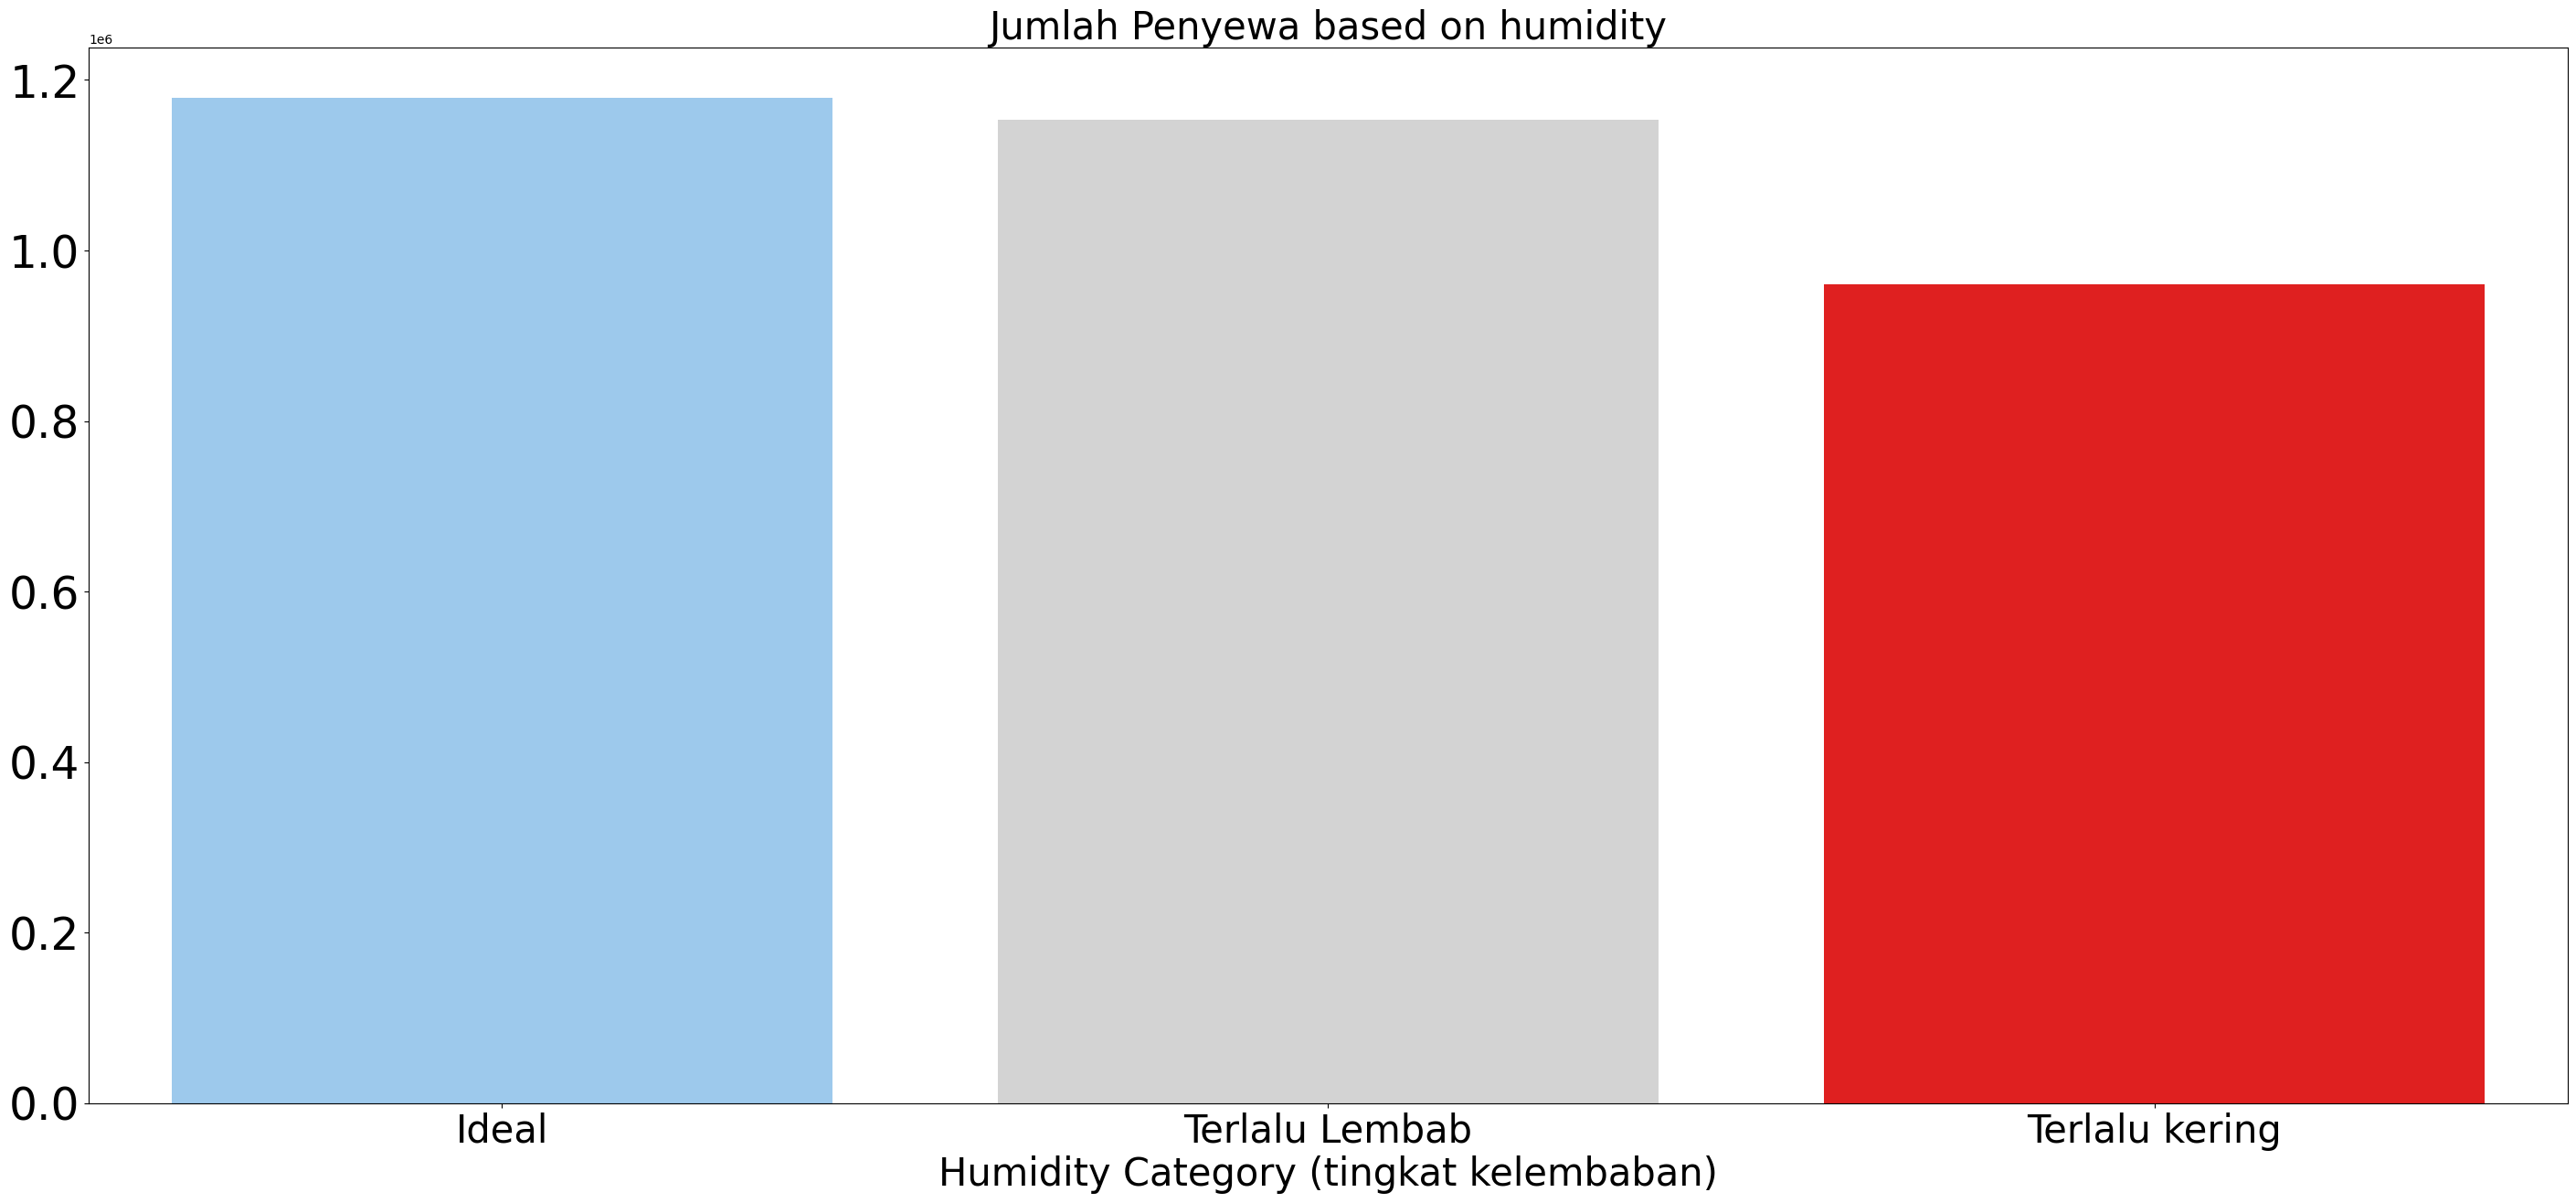

In [29]:
# membuat bar chart untuk melihat korelasi antara tingkat kelembaban dengan jumlah penyewa
plt.figure(figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="humidity_category", y="cnt", data=humidity_sum.head(5), palette=["#90CAF9", "#D3D3D3", "#ff0000"])

# mengatur label dan judul untuk subplot pertama
plt.ylabel(None)
plt.xlabel("Humidity Category (tingkat kelembaban)", fontsize=30)
plt.title("Jumlah Penyewa based on humidity", loc="center", fontsize=30)
plt.tick_params(axis='y', labelsize=35)
plt.tick_params(axis='x', labelsize=30)

**Insight:**
- dapat dilihat bahwa pada kategori terlalu kering, memiliki jumlah penyewa yang paling sedikit di bandingkan "ideal" & "terlalu lembab" untuk reasonnya mengapa? mungkin saat kering penyewa lebih less interest karena kondisi yang panas
- lalu untuk kondisi "terlalu lembab" & "ideal" memiliki jumlah perbedaan penyewa yang tidak signifikan

### Pertanyaan 3:
-Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir


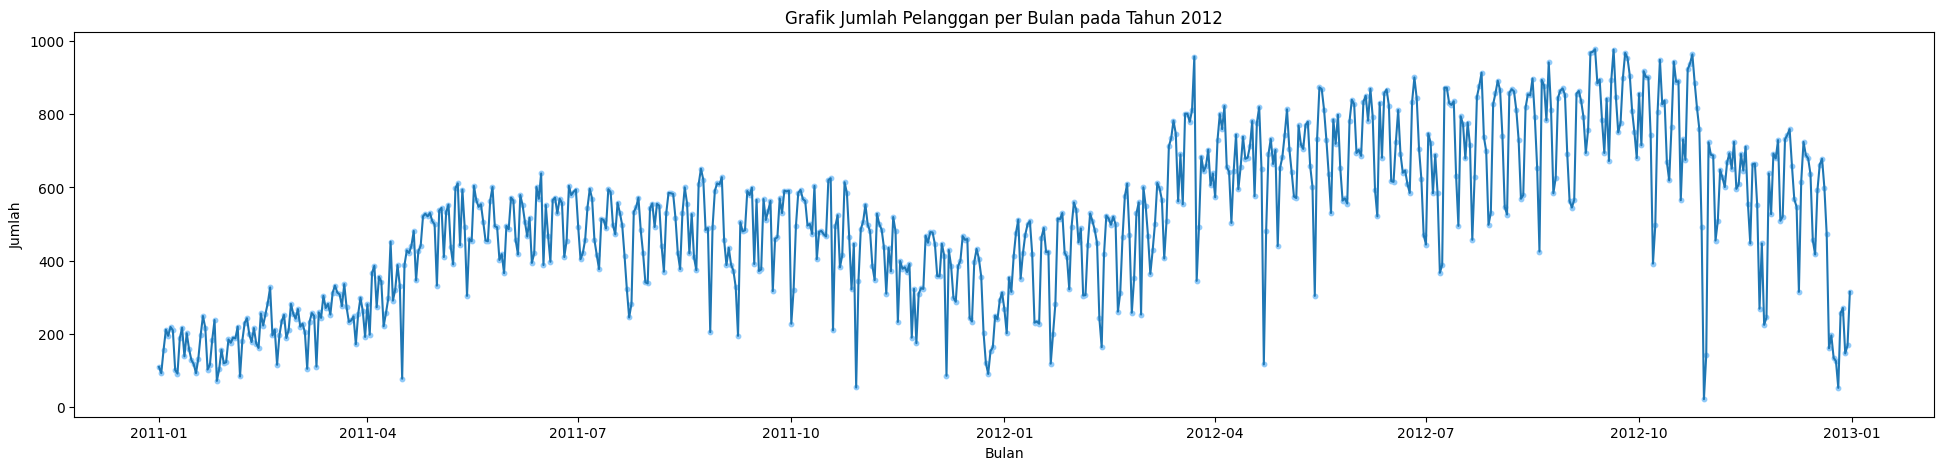

In [30]:
# mmebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['cnt'].groupby(day_df['dteday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()

dari grafik di atas terlihat lebih jelas peningkatan jumlah penyewa dari tahun 2011 - bulan 1 hingga 2012 - 07 telat menningkat secara konsisten

### Pertanyaan 4
-Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual

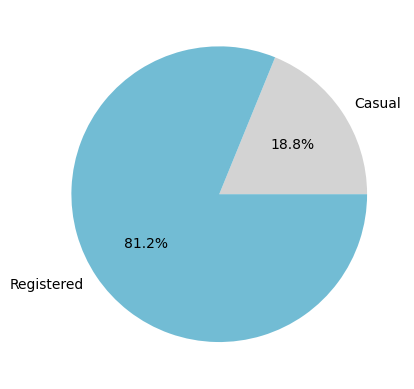

In [31]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

jumlah orang yang sudah registered sebanyak 81.2% sedangkan orang yang belum melakukan regsitered (casual) sebanyak 18.8%



## Conclusion

Pertanyaan 1 = jam berapa yang paling banyak dan paling sedikit penyewanya?

Pertanyaan 2 = apakah tingkat kelembaban mempengaruhi jumlah penyewa?

Pertanyaan 3 = Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir

Pertanyaan 4 = Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual



**Conclution pertanyaan 1** => Berdasarkan grafik yang telah dimunculkan dapat di tarik kesimpulan bahwa puncak jumlah penyewa berada di sore hari yaitu pukul  17.00  dan untuk jumlah penyewa paling sedikit berada pada subuh jam 04.00

**Conclution pertanyaan 2** => tingkat kelembaban tidak mempengaruhiu secara signifkan, tapi dapat dilihat para penyewa lebih banyak pada saat kondisi "ideal" & "terlalu Lembab" di bandingkan "terlalu kering" mungkin karena saat kondisi panas lebih sedikit peminat untuk bersepeda

**Conclution pertanyaan 3** => berdsarkan hasil analisis sebelumnya (non grafik) di atas dapat dilihat bawhwa bahwa pada pada tahun 2012 terjadi peningkatan penyewa sebesar 68.38% untuk registered user & 50.76% untuk casual user, lalu jika dalam bentuk fragik dapat dilihat peningkatan yang konsistten dari tahun 2011 bulan 1 hingga 2012 bulan 7

**Conclution pertanyaan 4** => 80% penyewa adalah user refistrred, sedangkan 20%-nya adalah user casual yang belum terdaftar



## Analisis Lanjutan

#### 1. RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

Recency (seberapa baru pelanggan berinteraksi dengan bisnis)

Frequency (banyaknya pelanggan dalam berinteraksi)

Monetary (banyaknya uang yang mereka gunakan)

In [32]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## 2 Analisis Clustering

- sudah sempat saya terapkan pada analisis sebelumnya yaitu clustering Season(musim), clustering berdasarkan tingkat kelemembaba(humidity_category)

In [52]:
# Clustering berdasarkan Hari

#menentukan order hari
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#ubah kolom "weekday" menjadi tipe categorical berdasarkan list yang ada di weekday_order
hour_df["weekday"] = pd.Categorical(hour_df["weekday"], categories=weekday_order, ordered=True)

#Mengelompokan jumlah penyewa berdasarkan hari
total_sewa_hari = hour_df.groupby(by="weekday").agg({
    "cnt": ["count"]}).sort_index()

# Beri alias pada kolom hasil
total_sewa_hari.columns = ["jumlah_penyewa"]

print(total_sewa_hari)

           jumlah_penyewa
weekday                  
Monday               2479
Tuesday              2453
Wednesday            2475
Thursday             2471
Friday               2487
Saturday             2512
Sunday               2502


<ipython-input-52-99d5782285b4>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sewa_hari = hour_df.groupby(by="weekday").agg({


#### Insight
 Dari hasil clustering jumlah penyewa berdasarkan hari di atas, dapat di tarik kesimpulan bahwa hari tidak menentukan jumlah penyewa karena tidak ada perbedaan yang signifikan dari senin - minggu

In [59]:
# Clustering berdasarkan tingkat kelembaban
tot_lembab = hour_df.groupby(by="humidity_category").agg({
    "cnt": ["count"]})

tot_lembab.columns = ["jumlah_penyewa"]

print(tot_lembab)

                   jumlah_penyewa
humidity_category                
Ideal                        5505
Terlalu Lembab               8356
Terlalu kering               3518


#### Insight
Dapat dilihat hasil dari clusterin di atas, terbagi menjadi 3 jenis yaitu "Ideal", "Terlalu Lembab" & "Terlalu Kering" yang dimana jumlah penyewa paling banyak terletak pada Category "Terlalu Lembab" & Jumlah paling  sedikit terletak pada "Terlalu Kering"

In [64]:
#Clustering berdasarkan weather stituation
tot_penyewa_weath = hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

tot_penyewa_weath.columns = ["jumlah penyewa"]

print(tot_penyewa_weath)


weathersit
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: cnt, dtype: int64


#### Insight
Dapat dilihat hasil dari clusterin di atas, para penyewa terbanyak terdapat pada category cuaca "Clear" dan paling sedikit adalah ketika "Heavy Rainsnow"